In [1]:
import numpy as np
import awkward as ak
import fastjet
import uproot as ur
import matplotlib.colors as mcolors
import mplhep as hep
import matplotlib.pyplot as plt
import math
import matplotlib as colors
import matplotlib as abc
from scipy.optimize import curve_fit
import pandas as pd
from iminuit import Minuit
from iminuit.cost import LeastSquares
import pickle

hep.style.use(hep.style.CMS)
hep.style.use("CMS")
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [2]:
with open('Pythia6GenR0.5.pickle', 'rb') as handle:
    gen_dict = pickle.load(handle)
with open('Pythia6RecoR0.5.pickle', 'rb') as handle:
    reco_dict = pickle.load(handle)

In [3]:
with open('Pythia6RecoR0.5.pickle', 'rb') as handle:
    reco_dict_test = pickle.load(handle)
with open('Pythia6GenR0.5.pickle', 'rb') as handle:
    gen_dict_test = pickle.load(handle)

Text(0.5, 1.0, 'Pythia8 Full Sim')

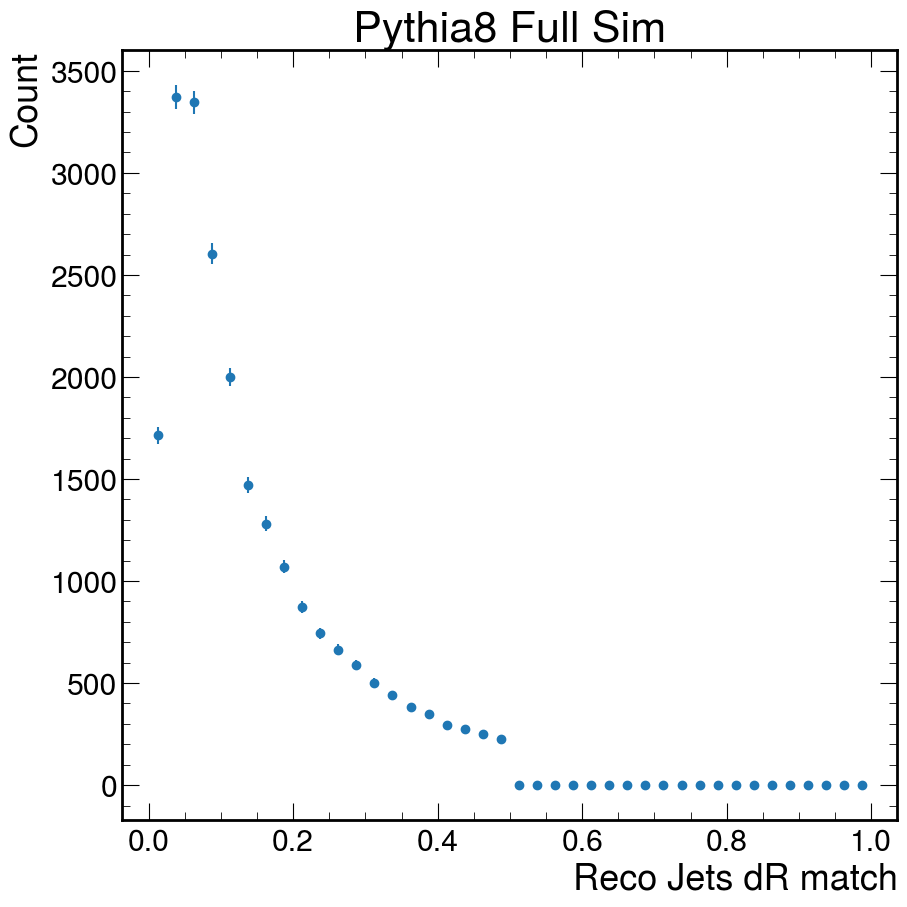

In [4]:
hist, bin_edges = np.histogram(ak.flatten(reco_dict['dR_new']),bins = 40, range=(0,1))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o")

plt.xlabel('Reco Jets dR match')
plt.ylabel('Count')
plt.title("Pythia8 Full Sim")

In [5]:
mask = (ak.flatten(reco_dict["matched_index_new"]) > -1)
matchedJetE = ak.flatten(reco_dict["energy"])[mask]
matchedJetEta = ak.flatten(reco_dict["eta"])[mask]
matchedJetPhi = ak.flatten(reco_dict["phi"])[mask]
#phiMask = (matchedJetPhi > -0.4) & (matchedJetPhi < 0.4)
#matchedJetE = matchedJetE[phiMask]


mask = (ak.flatten(gen_dict["matched_index_new"]) > -1)
matchedGjetE = ak.flatten(gen_dict["energy"])[mask]
matchedGjetEta = ak.flatten(gen_dict["eta"])[mask]
matchedGjetPhi = ak.flatten(gen_dict["phi"])[mask]
#matchedGjetE = matchedGjetE[phiMask]

mask = ak.flatten(reco_dict["matched_index_new"]) == -1
unmatchedJetE = ak.flatten(reco_dict["energy"])[mask]
unmatchedJetEta = ak.flatten(reco_dict["eta"])[mask]
unmatchedJetPhi = ak.flatten(reco_dict["phi"])[mask]

mask = ak.flatten(gen_dict["matched_index_new"]) == -1
unmatchedGjetE = ak.flatten(gen_dict["energy"])[mask]
unmatchedGjetEta = ak.flatten(gen_dict["eta"])[mask]
unmatchedGjetPhi = ak.flatten(gen_dict["phi"])[mask]

In [6]:
mask = (ak.flatten(reco_dict_test["matched_index_new"]) > -1)
matchedJetEtest = ak.flatten(reco_dict_test["energy"])[mask]
matchedJetEtatest = ak.flatten(reco_dict_test["eta"])[mask]
matchedJetPhitest = ak.flatten(reco_dict_test["phi"])[mask]

mask = ak.flatten(gen_dict_test["matched_index_new"]) > -1
matchedGjetEtest = ak.flatten(gen_dict_test["energy"])[mask]
matchedGjetEtatest = ak.flatten(gen_dict_test["eta"])[mask]
matchedGjetPhitest = ak.flatten(gen_dict_test["phi"])[mask]

mask = ak.flatten(reco_dict_test["matched_index_new"]) == -1
unmatchedJetEtest = ak.flatten(reco_dict_test["energy"])[mask]
unmatchedJetEtatest = ak.flatten(reco_dict_test["eta"])[mask]
unmatchedJetPhitest = ak.flatten(reco_dict_test["phi"])[mask]

mask = ak.flatten(gen_dict_test["matched_index_new"]) == -1
unmatchedGjetEtest = ak.flatten(gen_dict_test["energy"])[mask]
unmatchedGjetEtatest = ak.flatten(gen_dict_test["eta"])[mask]
unmatchedGjetPhitest = ak.flatten(gen_dict_test["phi"])[mask]

In [7]:
PairedGenE = matchedGjetE
PairedRecoE = matchedJetE
JetR = PairedRecoE/PairedGenE

PairedGenEtest = matchedGjetEtest
PairedRecoEtest = matchedJetEtest
JetRtest = PairedRecoEtest/PairedGenEtest

/home/sean/miniconda3/envs/test-env/lib/python3.11/site-packages/awkward/_connect/numpy.py:395: RuntimeWarning: invalid value encountered in divide
  result = impl(*args, **kwargs)


Text(0, 1, 'Count')

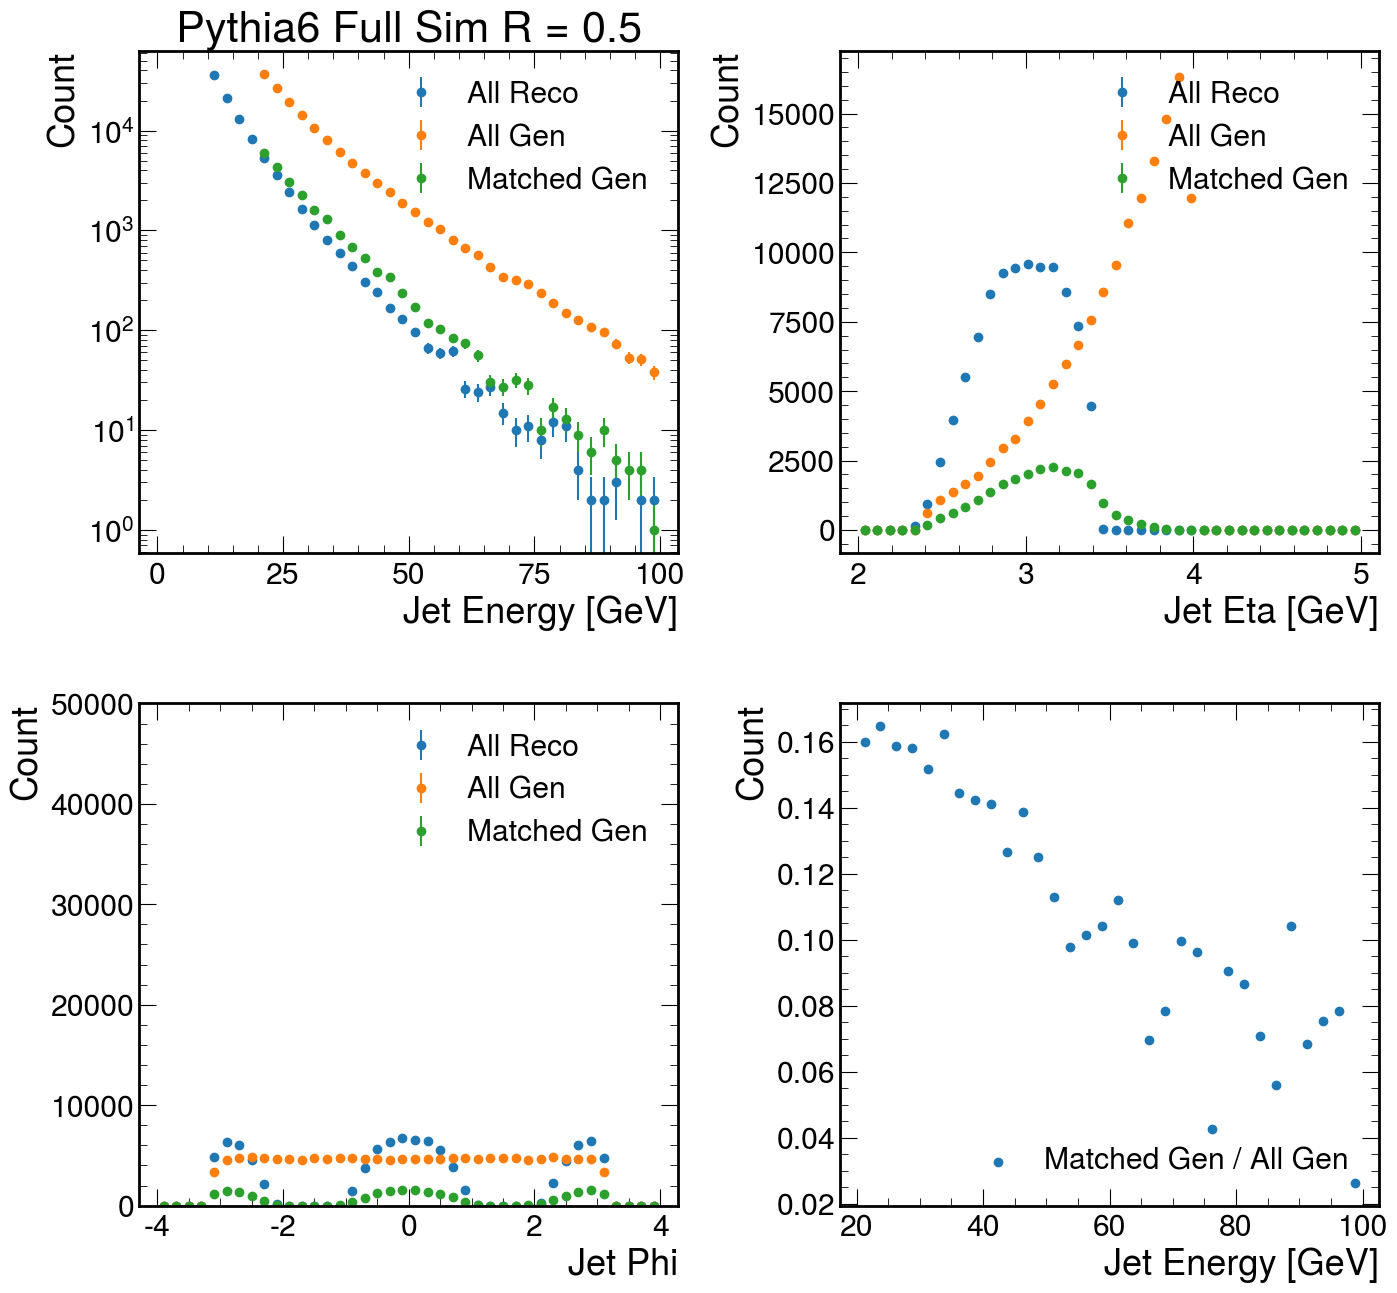

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 15), gridspec_kw={'wspace': 0.3,'hspace': 0.3})

plt.sca(axs[0][0])


hist, bin_edges = np.histogram(ak.flatten(reco_dict["energy"]),range=(0,100),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o", label="All Reco")

hist, bin_edges = np.histogram(ak.flatten(gen_dict["energy"]),range=(0,100),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o", label="All Gen")

hist, bin_edges = np.histogram(matchedGjetE,range=(0,100),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o", label="Matched Gen")

plt.legend()

plt.yscale("log")
plt.xlabel('Jet Energy [GeV]')
plt.ylabel('Count')
plt.title("Pythia6 Full Sim R = 0.5")

plt.sca(axs[0][1])


hist, bin_edges = np.histogram(ak.flatten(reco_dict["eta"]),range=(2,5),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o", label="All Reco")

hist, bin_edges = np.histogram(ak.flatten(gen_dict["eta"]),range=(2,5),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o", label="All Gen")

hist, bin_edges = np.histogram(matchedGjetEta,range=(2,5),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o", label="Matched Gen")
plt.legend(loc='upper right')
#plt.ylim(0,140000)
#plt.ylim(0,1000)

plt.xlabel('Jet Eta [GeV]')
plt.ylabel('Count')



plt.sca(axs[1][0])



hist, bin_edges = np.histogram(ak.flatten(reco_dict["phi"]),range=(-4,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o", label="All Reco")

hist, bin_edges = np.histogram(ak.flatten(gen_dict["phi"]),range=(-4,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o", label="All Gen")

hist, bin_edges = np.histogram(matchedGjetPhi,range=(-4,4),bins=40)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o", label="Matched Gen")

plt.legend(loc="upper right")
plt.ylim(0,50000)
plt.xlabel('Jet Phi')
plt.ylabel('Count')




plt.sca(axs[1][1])
hist2, bin_edges = np.histogram(ak.flatten(gen_dict["energy"]),range=(0,100),bins=40)

hist1, bin_edges = np.histogram(matchedGjetE,bins = 40, range=(0,100))
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2


plt.scatter(np.array(bin_centres),np.array(hist1/hist2),marker="o", label="Matched Gen / All Gen")


plt.legend(loc="lower right")
#plt.ylim(0,1100)
plt.xlabel('Jet Energy [GeV]')
plt.ylabel('Count')





In [9]:
lowerRange = 2
upperRange = 8

19.288762935728432
25.963202766506843
33.568201483598926
43.26587813987361
52.399935668900696
60.92656412968325


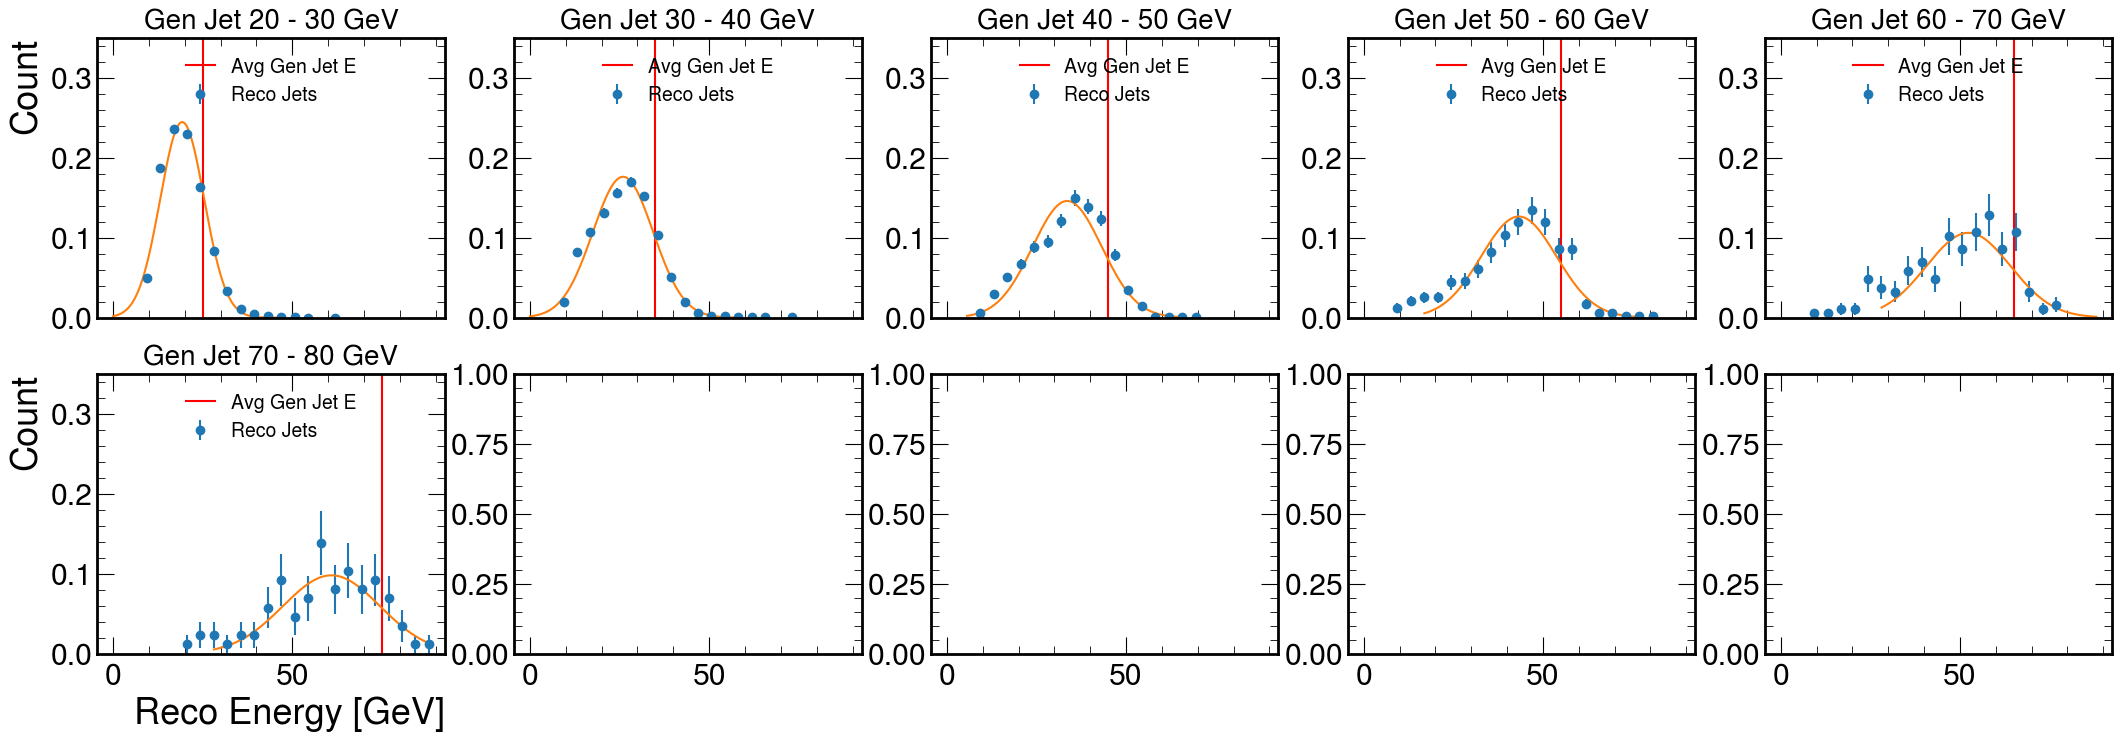

In [10]:
fig, axs=plt.subplots(2, 5, figsize=(26,8),sharex=True)
#fig.subplots_adjust(wspace=0.4, hspace=0)

def gauss(x, A, mu, sigma):
    #A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))
    
def least_squares_loss(A, mu, sigma):
    y = gauss(bins, A, mu, sigma)
    return np.sum((hist - y)**2)


AvgEReco = []
AvgERecoErr = []

NumEReco = []
NumERecoErr = []

GenSlice = []

for i in range(lowerRange,upperRange):
    x = (i-2) // 5  
    y = (i-2) % 5
    plt.sca(axs[x][y])
        
    genEBin = (PairedGenE > (i)*10) & (PairedGenE < (i+1)*10)
    
    hist, bin_edges = np.histogram(PairedRecoE[genEBin],bins=40,range=(0,150))
    
    zerocut = (hist > 0)
    total = np.sum(hist[zerocut])
    errs = np.sqrt(hist[zerocut]) / total
    hist = hist[zerocut] / total
    
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    bins = bin_centres[zerocut]
    
    minFit = bins[np.argmax(hist)] - 30
    maxFit = bins[np.argmax(hist)] + 30

    fitCut = (bins > minFit) & (bins < maxFit)
    plt.errorbar(np.array(bins),np.array(hist),yerr=errs,fmt="o", label='Reco Jets')
    
    plt.axvline((i+0.5)*10,color='red',label="Avg Gen Jet E")
    GenSlice.append((i+0.5)*10)
       
    least_squares = LeastSquares(list(bins[fitCut]),list(hist[fitCut]),list(errs[fitCut]),gauss)
    m = Minuit(least_squares, A=max(hist), mu = np.mean(PairedRecoE[genEBin]), sigma = np.std(PairedRecoE[genEBin]))
    m.limits["mu"] = (minFit, maxFit)
    m.migrad()
    m.hesse()
   
    fitPlotCut = (np.linspace(0,150,5000) > minFit) & (np.linspace(0,150,5000) < maxFit)
    hist_fit = gauss(np.linspace(0,150,5000)[fitPlotCut], m.values[0],m.values[1],m.values[2])
    plt.plot(np.linspace(0,150,5000)[fitPlotCut], hist_fit)
    
    NumEReco.append(np.mean(PairedRecoE[genEBin]))
    NumERecoErr.append(np.std(PairedRecoE[genEBin]))
    print(m.values[1])
    if not math.isnan(m.values[1]) :
        AvgEReco.append(m.values[1])
        AvgERecoErr.append(m.errors[1]/total)
    else:
        AvgEReco.append(0)
        AvgERecoErr.append(0)

  
    if(y == 0):
        plt.ylabel("Count")
    if(x == 1):
        plt.xlabel("Reco Energy [GeV]")
    #plt.title('Gen Jet %2.0f - %2.0f GeV'%(i*10, (i+1)*10),fontsize=20)
    plt.legend(loc='upper center',fontsize=14)
    plt.title('Gen Jet %2.0f - %2.0f GeV'%(i*10, (i+1)*10),fontsize=20)
    #plt.yscale("log")
    plt.ylim(0,0.35)

#plt.tight_layout(pad=0.0)
#plt.subplots_adjust(hspace=0.0, wspace=0.0)

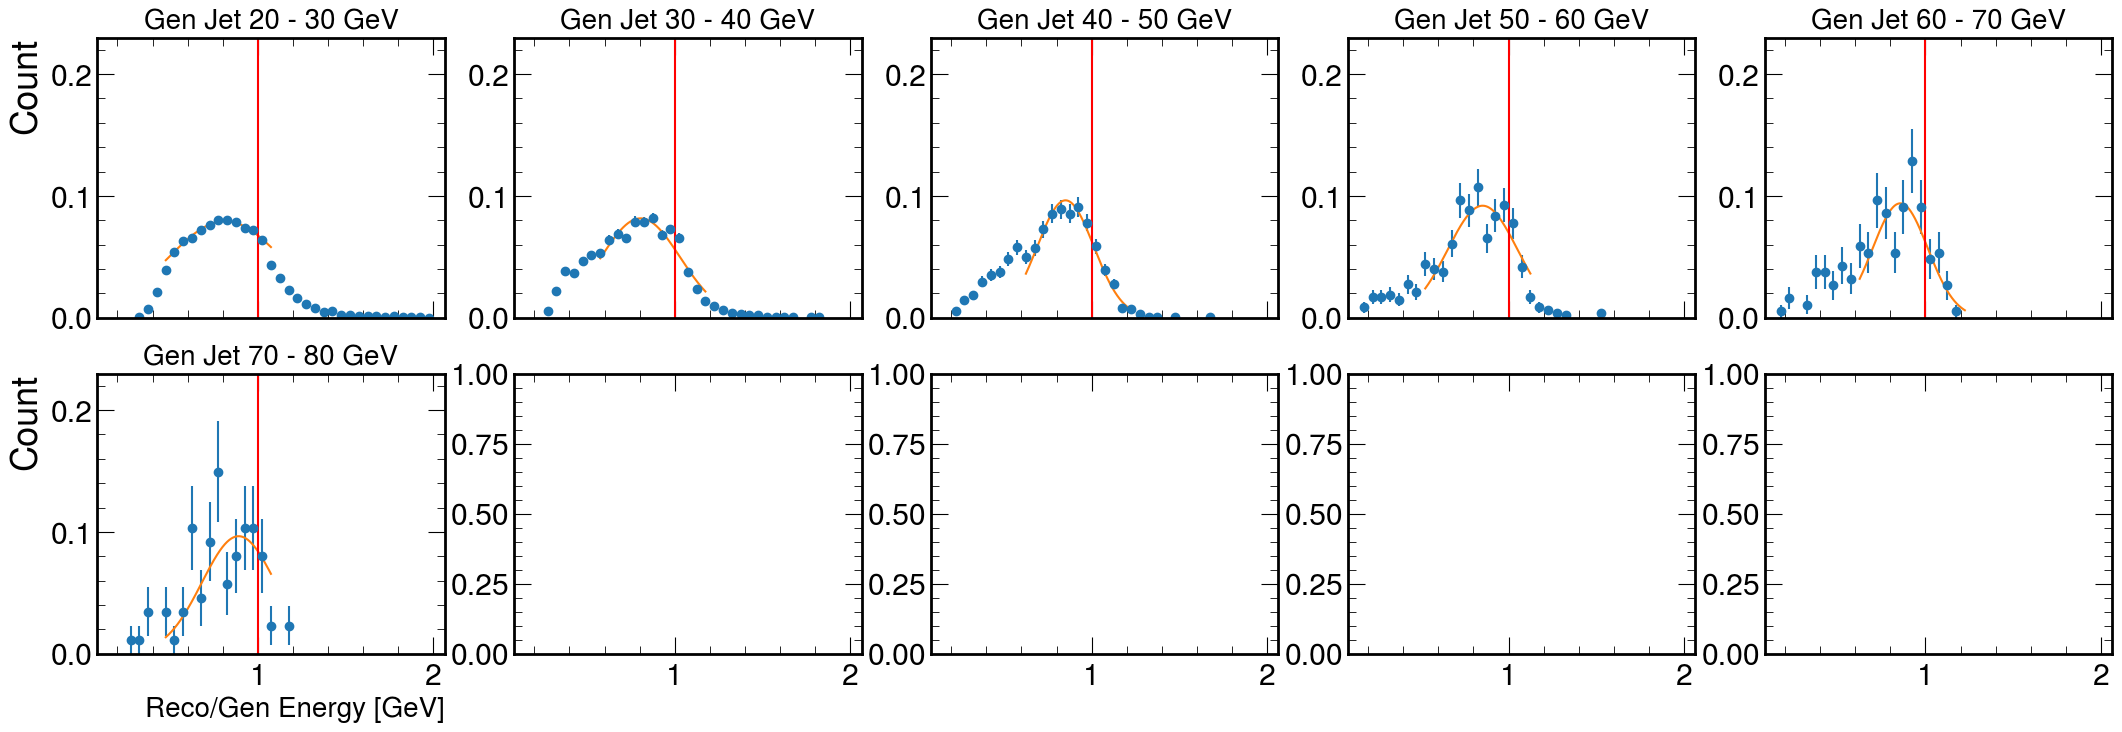

In [11]:
fig, axs=plt.subplots(2, 5, figsize=(26,8),sharex=True)
#fig.subplots_adjust(wspace=0.4, hspace=0)
#JetR = PairedRecoE/PairedGenE
AvgR = []
AvgRErr = []

NumR = []
NumRErr = []

for i in range(lowerRange,upperRange):
    x = (i-2) // 5  
    y = (i-2) % 5
    plt.sca(axs[x][y])
        
    genEBin = (PairedGenE > i*10) & (PairedGenE < (i+1)*10)
    
    hist, bin_edges = np.histogram(JetR[genEBin],bins=40,range=(0,2))
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    bins = bin_centres
    
    zerocut = (hist > 0)
    total = np.sum(hist[zerocut])
    errs = np.sqrt(hist[zerocut]) / total
    hist = hist[zerocut] / total
    
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    bins = bin_centres[zerocut]
    
    plt.errorbar(np.array(bins),np.array(hist),yerr=errs,fmt="o")

    minFit = bins[np.argmax(hist)] - 0.3
    maxFit = bins[np.argmax(hist)] + 0.3
 
    fitCut = (bins > minFit) & (bins < maxFit)
    
    
    least_squares = LeastSquares(np.array(bins[fitCut]),np.array(hist[fitCut]),np.array(errs[fitCut]),gauss)
    
    m = Minuit(least_squares, A=max(hist), mu = 1.0, sigma = np.std(PairedRecoE[genEBin]/PairedGenE[genEBin]))
    
    m.migrad()
    m.hesse()
    
    fitPlotCut = (np.linspace(0,2,5000) > minFit) & (np.linspace(0,2,5000) < maxFit)
    hist_fit = gauss(np.linspace(0,2,5000)[fitPlotCut], m.values[0],m.values[1],m.values[2])
    plt.plot(np.linspace(0,2,5000)[fitPlotCut], hist_fit)
    
    NumR.append(np.mean(PairedRecoE[genEBin]/PairedGenE[genEBin]))
    NumRErr.append(np.std(PairedRecoE[genEBin]/PairedGenE[genEBin]))
    plt.axvline(1,color='red')
    if (not math.isnan(m.values[1])):
        AvgR.append(m.values[1])

        AvgRErr.append(m.errors[1]/ total)

    else:
        AvgR.append(0)
        AvgRErr.append(0)

  
    if(y == 0):
        plt.ylabel("Count")
    if(x == 1):
        plt.xlabel("Reco/Gen Energy [GeV]",fontsize=20)
    plt.title('Gen Jet %2.0f - %2.0f GeV'%(i*10, (i+1)*10),fontsize=20)

    #plt.yscale("log")
    plt.ylim(0,0.23)

#plt.tight_layout(pad=0.0)
#plt.subplots_adjust(hspace=0.0, wspace=0.0)

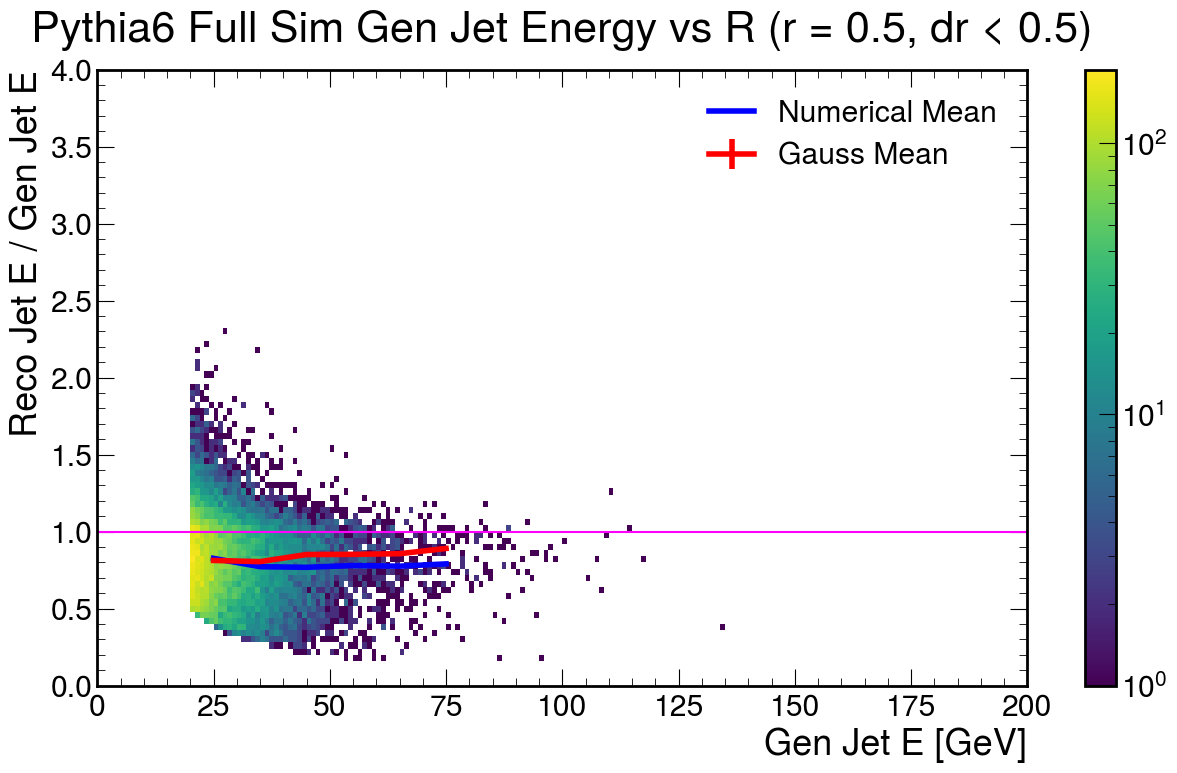

In [12]:
fig = plt.figure(figsize=(15,8))

plt.hist2d(np.array(PairedGenE),np.array(JetR),bins=(200,100),range=([0,200],[0,4]),cmap='viridis',norm=abc.colors.LogNorm())
cbar = plt.colorbar()
plt.errorbar(GenSlice, AvgR, yerr=AvgRErr,color='red',label="Gauss Mean",linewidth=4)
plt.plot(GenSlice, NumR, color='blue',label="Numerical Mean",linewidth=4)
plt.plot(np.linspace(0,200,1000),np.ones(1000),color='magenta')
plt.legend()
plt.xlabel('Gen Jet E [GeV]')
plt.ylabel('Reco Jet E / Gen Jet E')
plt.title("Pythia6 Full Sim Gen Jet Energy vs R (r = 0.5, dr < 0.5)",pad = 20.0)
plt.show()

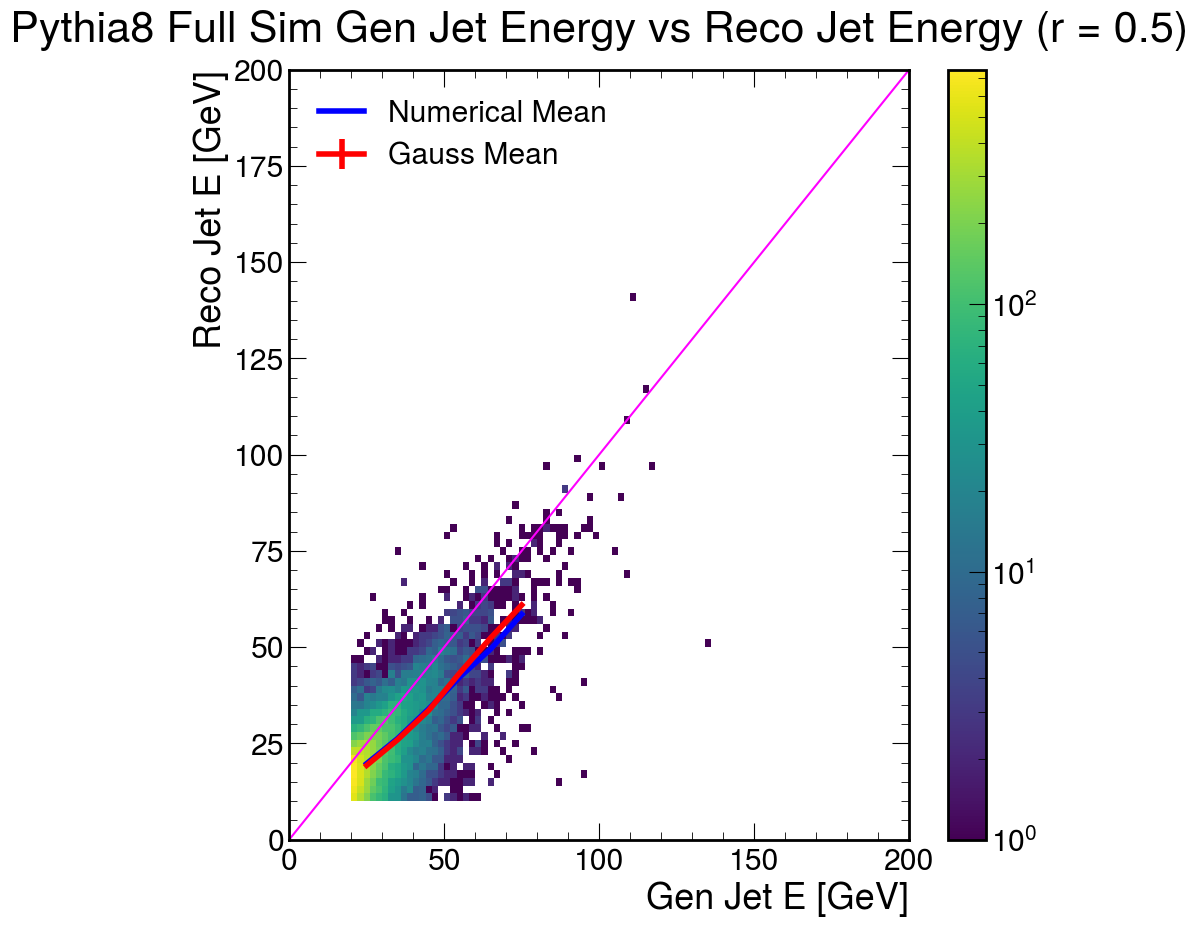

In [13]:
plt.hist2d(np.array(PairedGenE),np.array(PairedRecoE),bins=(100,100),range=([0,200],[0,200]),cmap='viridis',norm=abc.colors.LogNorm())
cbar = plt.colorbar()
plt.errorbar(GenSlice, AvgEReco, yerr=AvgERecoErr,color='red',label="Gauss Mean",linewidth=4)
plt.plot(GenSlice, NumEReco, color='blue',label="Numerical Mean",linewidth=4)
plt.plot(np.linspace(0,200,1000),np.linspace(0,200,1000),color='magenta')
plt.legend(loc='upper left')
plt.xlabel('Gen Jet E [GeV]')
plt.ylabel('Reco Jet E [GeV]')
plt.title("Pythia8 Full Sim Gen Jet Energy vs Reco Jet Energy (r = 0.5)",pad = 20.0)
plt.show()

/tmp/ipykernel_284297/2255102337.py:3: RuntimeWarning: divide by zero encountered in log
  return A + (B*np.log(ereco)) + (C*np.square(np.log(ereco)))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[19.288762935728432, 25.963202766506843, 33.568201483598926, 43.26587813987361, 52.399935668900696, 60.92656412968325]
<ValueView A=3.926773504654761 B=-1.9862131116486896 C=0.31559799662381605>


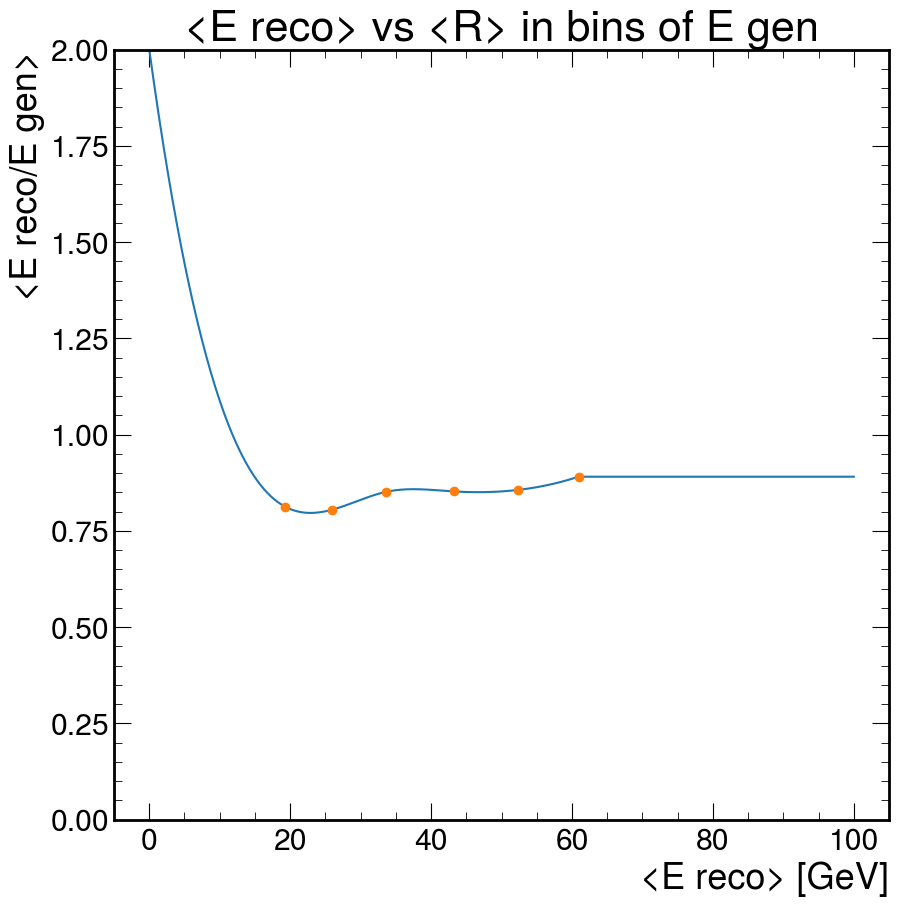

In [14]:
from scipy.interpolate import CubicSpline
def correct(ereco, A, B, C):
    return A + (B*np.log(ereco)) + (C*np.square(np.log(ereco)))

least_squares = LeastSquares(AvgEReco,AvgR,AvgRErr,correct)
m = Minuit(least_squares, A=0.37, B = 0.15, C = -0.01)
m.migrad()
m.hesse()
#plt.plot(np.linspace(0,100,5000), correct(np.linspace(0,100,5000), 0.37, 0.15, -0.01))
correct_fit = correct(np.linspace(0,100,5000), m.values[0], m.values[1], m.values[2])
#plt.plot(np.linspace(0,100,5000), correct_fit, label="Fit")

plt.legend()

print(AvgEReco)
spl = CubicSpline(AvgEReco, AvgR)
xnew = np.linspace(0, 100, num=1001)
def custom_spline(x):
    if isinstance(x, (list, np.ndarray)):
        return np.array([custom_spline(xi) for xi in x])
    
    if x <= AvgEReco[-1]:
        return spl(x)
    else:
        return AvgR[-1]


plt.plot(xnew,custom_spline(xnew))


plt.errorbar(np.array(AvgEReco),np.array(AvgR),xerr=AvgERecoErr,yerr=AvgRErr,fmt="o")
plt.ylim(0,2)
plt.title("<E reco> vs <R> in bins of E gen")
plt.ylabel("<E reco/E gen>")
plt.xlabel("<E reco> [GeV]")
print(m.values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


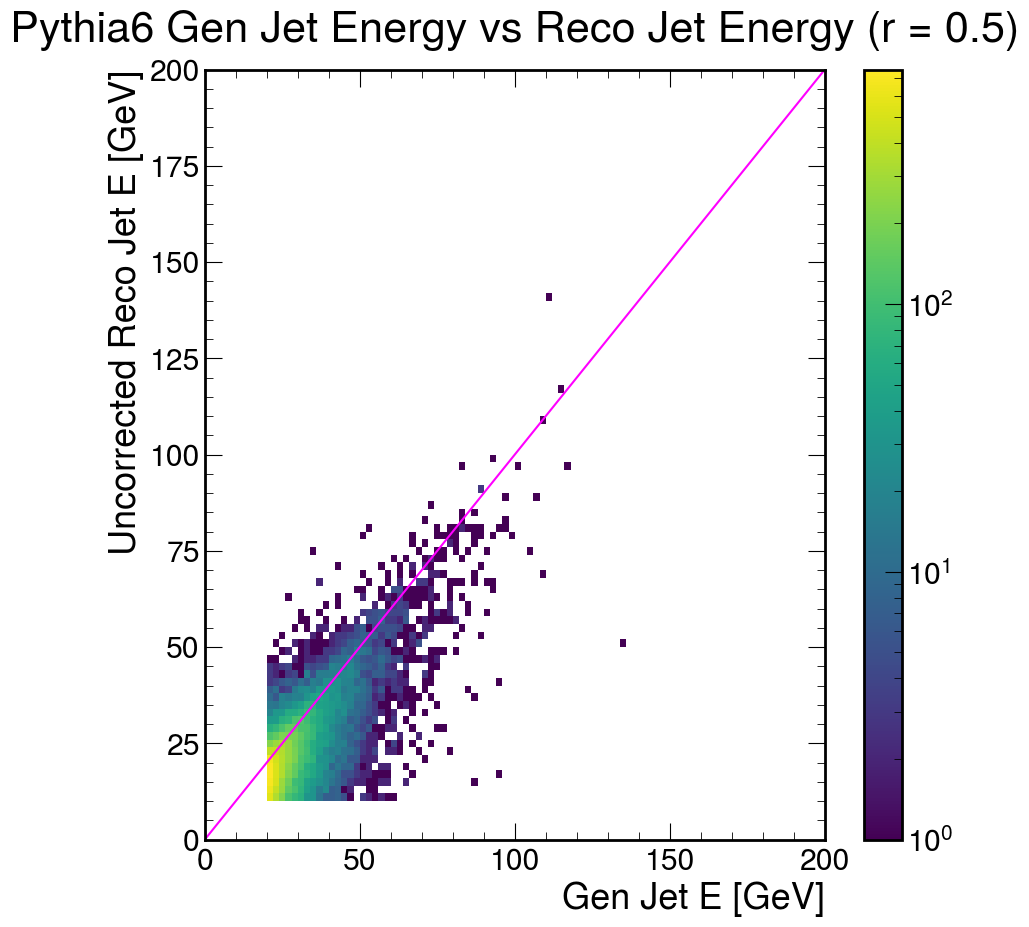

In [15]:
plt.hist2d(np.array(PairedGenEtest),np.array(PairedRecoEtest),bins=(100,100),range=([0,200],[0,200]),cmap='viridis',norm=abc.colors.LogNorm())
cbar = plt.colorbar()
plt.plot(np.linspace(0,200,1000),np.linspace(0,200,1000),color='magenta')
plt.legend(loc='upper left')
plt.xlabel('Gen Jet E [GeV]')
plt.ylabel('Uncorrected Reco Jet E [GeV]')
plt.title("Pythia6 Gen Jet Energy vs Reco Jet Energy (r = 0.5)",pad = 20.0)
plt.show()

In [16]:
enMask = (PairedRecoEtest > lowerRange*10)

correctedReco = np.array(PairedRecoEtest)[enMask] / custom_spline(np.array(PairedRecoEtest)[enMask])

JetRC = correctedReco/PairedGenEtest[enMask]

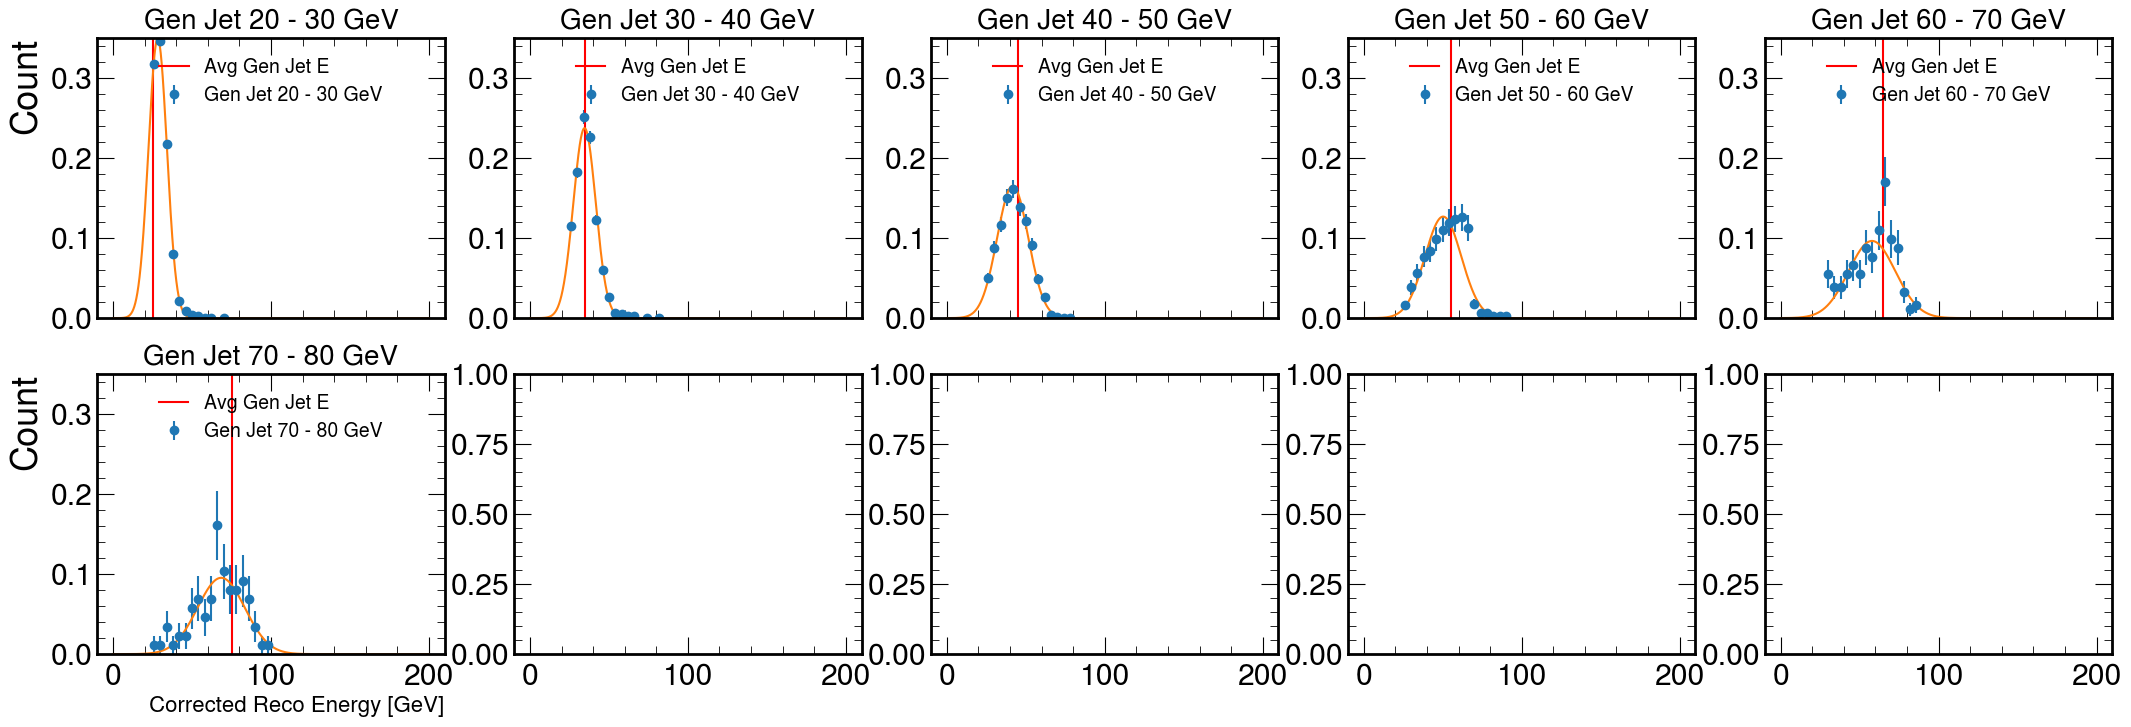

In [17]:
fig, axs=plt.subplots(2, 5, figsize=(26,8),sharex=True)
#fig.subplots_adjust(wspace=0.4, hspace=0)

def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


CAvgEReco = []
CAvgERecoErr = []

CNumEReco = []
CNumERecoErr = []

GenSlice = []

for i in range(lowerRange,upperRange):
    x = (i-2) // 5  
    y = (i-2) % 5
    plt.sca(axs[x][y])
        
    genEBin = (PairedGenE[enMask] > i*10) & (PairedGenE[enMask] < (i+1)*10)
    
    hist, bin_edges = np.histogram(correctedReco[genEBin],bins=50,range=(0,200))
    
    
    zerocut = (hist > 0)
    errs = np.sqrt(hist[zerocut]) / np.sum(hist[zerocut])
    hist = hist[zerocut] / np.sum(hist[zerocut])
    
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    plt.errorbar(np.array(bin_centres[zerocut]),hist,yerr=errs,fmt="o", label='Gen Jet %2.0f - %2.0f GeV'%(i*10, (i+1)*10))
    
    plt.axvline((i+0.5)*10,color='red', label="Avg Gen Jet E")
    GenSlice.append((i+0.5)*10)
    
    least_squares = LeastSquares(list(bin_centres[zerocut]),list(hist),list(errs),gauss)
    m = Minuit(least_squares, A=max(hist), mu = (i+0.5)*10, sigma = np.std(correctedReco[genEBin]))
    m.migrad()
    m.hesse()
    hist_fit = gauss(np.linspace(0,200,5000), m.values[0],m.values[1],m.values[2])
    plt.plot(np.linspace(0,200,5000), hist_fit)
    plt.legend(loc='upper center',fontsize=14)
    CNumEReco.append(np.mean(correctedReco[genEBin]))
    CNumERecoErr.append(np.std(correctedReco[genEBin]))
    if not math.isnan(m.values[1]):
        CAvgEReco.append(m.values[1])
        CAvgERecoErr.append(m.errors[1])
    else:
        CAvgEReco.append(0)
        CAvgERecoErr.append(0)

    plt.ylim(0,0.35)
    if(y == 0):
        plt.ylabel("Count")
    if(x == 1):
        plt.xlabel("Corrected Reco Energy [GeV]", fontsize = 16)
    plt.title('Gen Jet %2.0f - %2.0f GeV'%(i*10, (i+1)*10),fontsize=20)

#print(CAvgEReco)
#print(CAvgERecoErr)

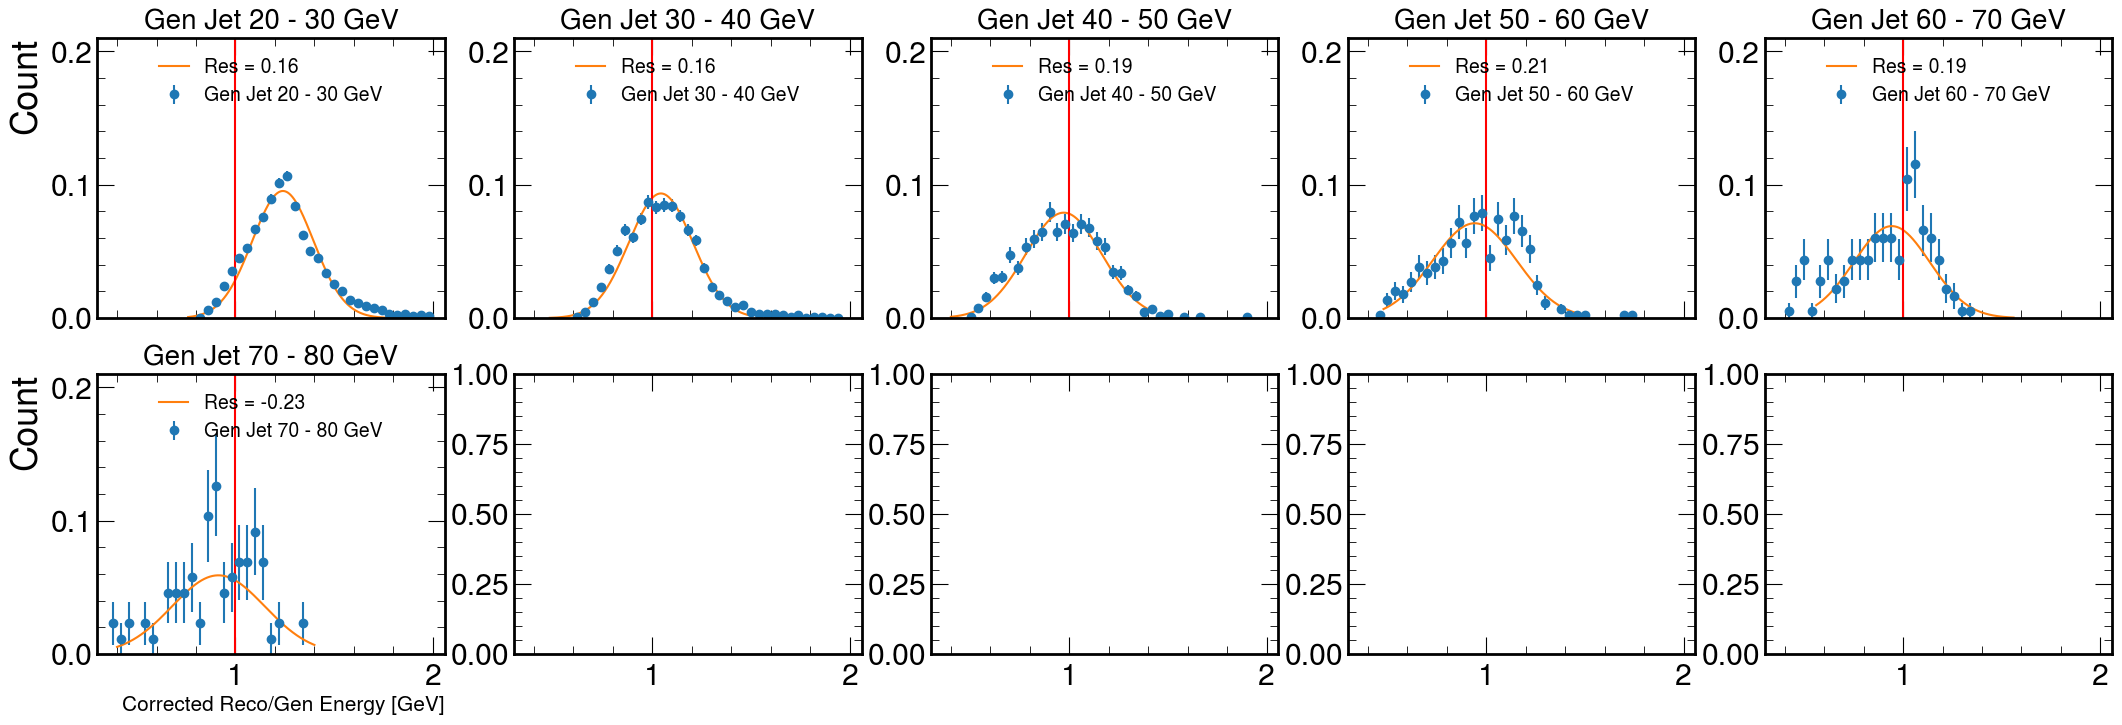

In [18]:
fig, axs=plt.subplots(2, 5, figsize=(26,8),sharex=True)
#fig.subplots_adjust(wspace=0.4, hspace=0)

def gauss(x, A, mu, sigma):
 
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

CAvgR = []
CAvgRErr = []

CNumR = []
CNumRErr = []

for i in range(lowerRange,upperRange):
    x = (i-2) // 5  
    y = (i-2) % 5
    plt.sca(axs[x][y])
        
    genEBin = (PairedGenE[enMask] > i*10) & (PairedGenE[enMask] < (i+1)*10)
    
    hist, bin_edges = np.histogram(JetRC[genEBin],bins=50,range=(0,2))
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
   
    
    zerocut = (hist > 0)
    errs = np.sqrt(hist[zerocut]) / np.sum(hist[zerocut])
    hist = hist[zerocut] / np.sum(hist[zerocut])
    bins = bin_centres[zerocut]
    
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    plt.errorbar(np.array(bin_centres[zerocut]),np.array(hist),yerr=errs,fmt="o", label='Gen Jet %2.0f - %2.0f GeV'%(i*10, (i+1)*10))

    minFit = bins[np.argmax(hist)] - 0.5
    maxFit = bins[np.argmax(hist)] + 0.5
 
    fitCut = (bins > minFit) & (bins < maxFit)
    
       
    least_squares = LeastSquares(list(bin_centres[zerocut][fitCut]),list(hist[fitCut]),list(errs[fitCut]),gauss)
    m = Minuit(least_squares, A=max(hist), mu = 1.0, sigma = np.std(JetRC[genEBin]))
    m.migrad()
    m.hesse()
    hist_fit = gauss(np.linspace(0,2,5000), m.values[0],m.values[1],m.values[2])
    fitPlotCut = (np.linspace(0,2,5000) > minFit) & (np.linspace(0,2,5000) < maxFit)
    hist_fit = gauss(np.linspace(0,2,5000)[fitPlotCut], m.values[0],m.values[1],m.values[2])
    
    plt.plot(np.linspace(0,2,5000)[fitPlotCut], hist_fit, label = "Res = %2.2f"%m.values[2])
    CNumR.append(np.mean(JetRC[genEBin]))
    CNumRErr.append(np.std(JetRC[genEBin]))
    plt.axvline(1,color='red')
    if (not math.isnan(m.values[1])):
        CAvgR.append(m.values[1])

        CAvgRErr.append(m.errors[1])
    else:
        CAvgR.append(0)
        CAvgRErr.append(0)
    plt.ylim(0,0.21)
    plt.legend(loc='upper center',fontsize=14)
    if(y == 0):
        plt.ylabel("Count")
    if(x == 1):
        plt.xlabel("Corrected Reco/Gen Energy [GeV]",fontsize=15)
    plt.title('Gen Jet %2.0f - %2.0f GeV'%(i*10, (i+1)*10),fontsize=20)


#print(CAvgR)
#print(CAvgRErr)

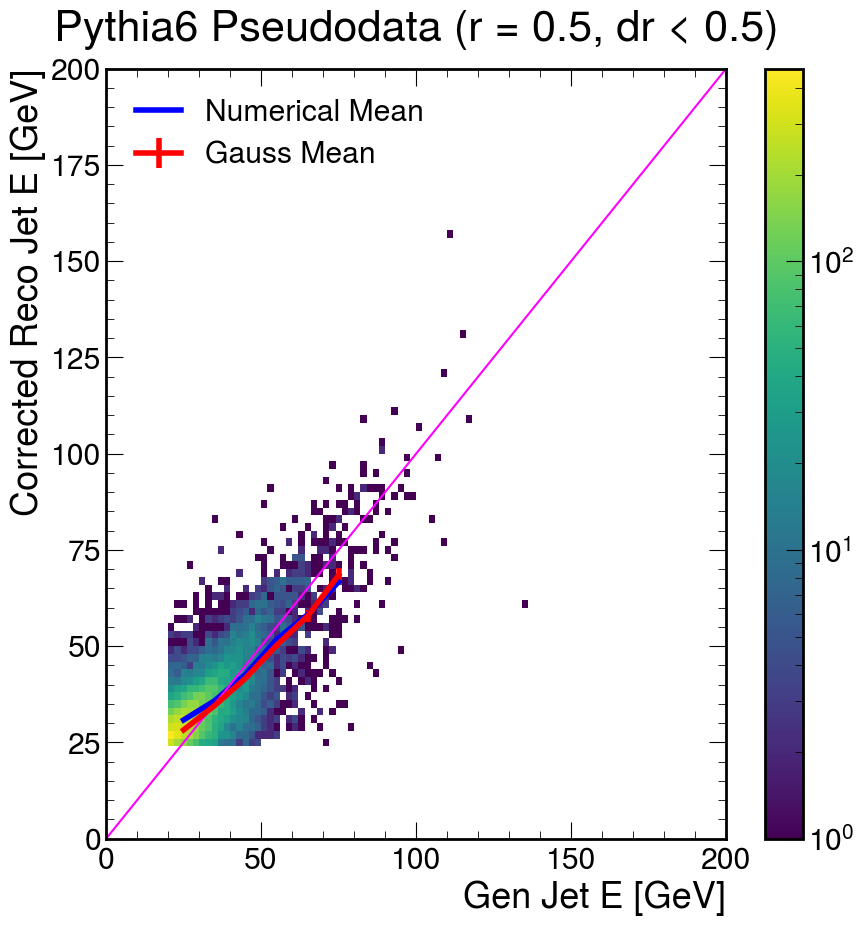

In [19]:
plt.hist2d(np.array(PairedGenE[enMask]),np.array(correctedReco),bins=(100,100),range=([0,200],[0,200]),cmap='viridis',norm=abc.colors.LogNorm())
cbar = plt.colorbar()
plt.errorbar(GenSlice, CAvgEReco, yerr=CAvgERecoErr,color='red',label="Gauss Mean",linewidth=4)
plt.plot(GenSlice, CNumEReco, color='blue',label="Numerical Mean",linewidth=4)
plt.plot(np.linspace(0,200,1000),np.linspace(0,200,1000),color='magenta')
plt.legend()
#print(CNumEReco) 
plt.xlabel('Gen Jet E [GeV]') 
plt.ylabel('Corrected Reco Jet E [GeV]')
plt.title("Pythia6 Pseudodata (r = 0.5, dr < 0.5)",pad = 20.0)
plt.show()

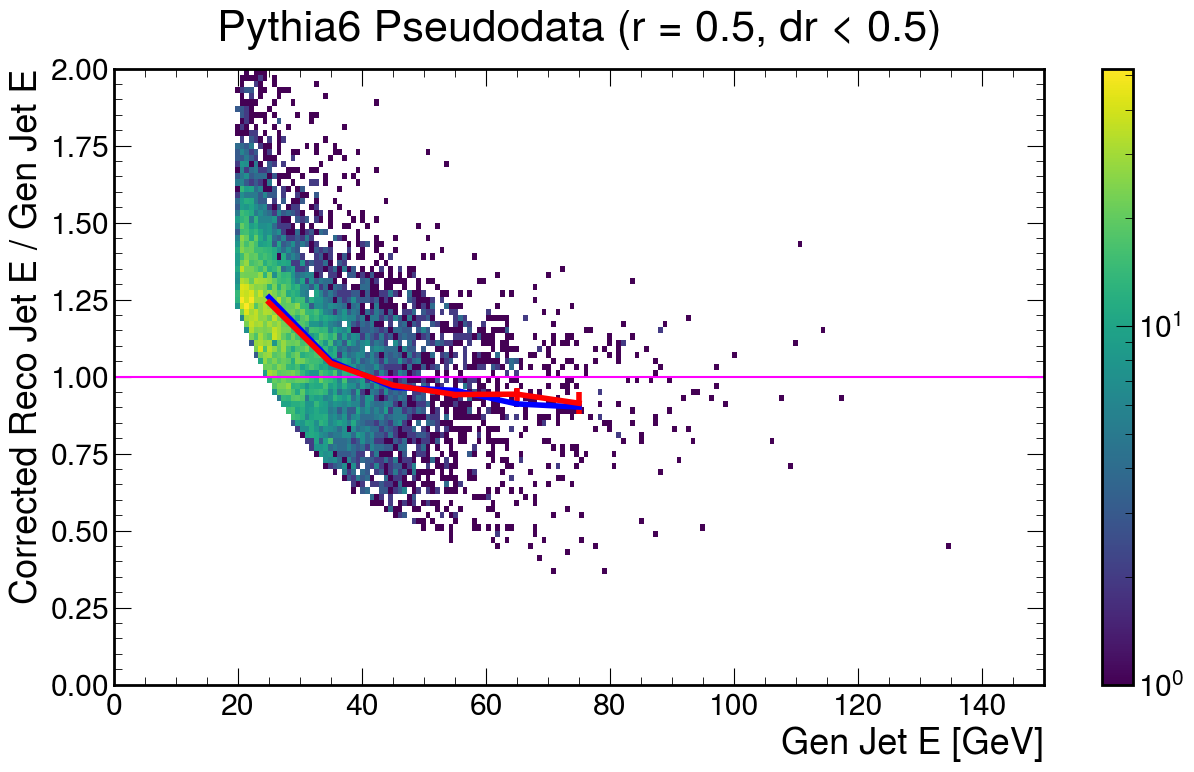

In [20]:
fig = plt.figure(figsize=(15,8))



plt.hist2d(np.array(PairedGenE[enMask]),np.array(JetRC),bins=(200,100),range=([0,150],[0,2]),cmap='viridis',norm=abc.colors.LogNorm())
cbar = plt.colorbar()

plt.errorbar(GenSlice, CAvgR, yerr=CAvgRErr,color='red',label="Gauss Mean",linewidth=4)
plt.plot(GenSlice, CNumR, color='blue',label="Numerical Mean",linewidth=4)
plt.plot(np.linspace(0,200,1000),np.ones(1000),color='magenta')

plt.xlabel('Gen Jet E [GeV]')
plt.ylabel('Corrected Reco Jet E / Gen Jet E')
plt.title("Pythia6 Pseudodata (r = 0.5, dr < 0.5)",pad = 20.0)
plt.show()